In [173]:
import pandas as pd
import numpy as np
import string
import googletrans
import re
import itertools

In [199]:
df = pd.read_csv('Twitter_Data.csv')

In [200]:
df.dropna(how='any',inplace=True)

In [201]:
df['category'] = df['category'].astype(int)

In [202]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
clean_text    162969 non-null object
category      162969 non-null int32
dtypes: int32(1), object(1)
memory usage: 3.1+ MB


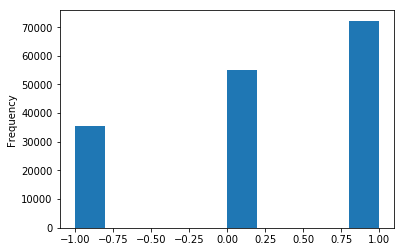

In [204]:
df['category'].plot(kind='hist',) #imbalanced data

In [205]:
df['category'].value_counts()

 1    72249
 0    55211
-1    35509
Name: category, dtype: int64

In [206]:
len(df[df['clean_text'].duplicated()]) #duplicate tweets if exist

0

# Removal of Punctuations

In [207]:
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]','') #removing punctuations

In [208]:
df['clean_text'] = df['clean_text'].str.replace('\n','') #removing \n 

# Removing numbers  

In [209]:
df['clean_text'] = df['clean_text'].str.replace("[0-9]", "") #removing numbers

In [210]:
df['clean_text'] = df['clean_text'].replace(u'\xa0', u' ') #removing\xa0

In [212]:
df['clean_text'] = df['clean_text'].str.lower()

# Stopwords removal, lemmatization

In [133]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hp-p\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [134]:
words = set(nltk.corpus.words.words())

In [213]:
df['clean_text'] = df['clean_text'].apply(lambda x: [w for w in x.split() if w in words])#only keeping english words

In [137]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp-p\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [216]:
df['clean_text'] = df['clean_text'].apply(lambda x : [word for word in x if word not in stopwords.words('english')]) #removing stopwords

In [151]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp-p\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [217]:
df['clean_text'] = df['clean_text'].apply(lambda x :[lmtzr.lemmatize(word) for word in x] )

In [218]:
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join(x))

In [226]:
df.head()

,clean_text,category
0,minimum government maximum governance begin di...,-1
1,talk nonsense continue drama vote,0
2,say vote welcome told main campaigner think relax,1
3,prefix great service confusion read crustal cl...,1
4,answer among powerful world leader today trump...,1
